In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

from LMC import Cmax

pi = np.pi

In [2]:
N0 = np.arange(8)+2
C0 = Cmax(N0)

True
fit = A*log(B*N)
(A,B) = (0.262,0.766)





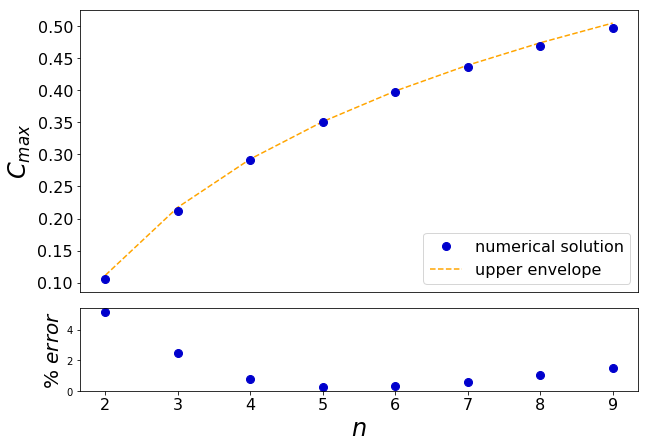

N 	C (true)  C (est.)
-- 	--------  --------
2 	   0.106     0.111
3 	   0.212     0.218
4 	   0.291     0.293
5 	   0.350     0.351
6 	   0.398     0.399
7 	   0.437     0.439
8 	   0.469     0.474
9 	   0.497     0.505


In [5]:
def residuals_for_fit(theta,N,C):
    A, B = theta
    
    return C - A*np.log(B*N)

theta = np.array([0.25,0.25])

theta, success = op.leastsq(residuals_for_fit, theta, args=(N0, C0))

A,B = theta


# here's the directly fit model
model = A*np.log(B*N0)
res   = C0 - model
y     = res.min()

# now shift it so that all residuals are positive
# i.e. overestimate Cmax so that after normalization C < 1
model -= y
res   -= y

# determine new model parameters
A1 = A
B1 = B*np.exp(-y/A)

model_1 = A1*np.log(B1*N0)

# check that they're equivalent
print(np.allclose(model,model_1))

# print new model parameters
print('fit = A*log(B*N)')
print('(A,B) = (%.3f,%.3f)' %(A1,B1))
print('\n\n')


plt.figure(figsize=(10,7))
plt.subplot2grid(shape=(4,1), loc=(0,0), rowspan=3, colspan=1)
plt.plot(N0, C0, 'o', c='mediumblue', ms=8, label='numerical solution')
plt.plot(N0, model, c='orange', ls='--', label='upper envelope', zorder=0)
plt.xticks([])
plt.ylabel(r'$C_{max}$', fontsize=24)
plt.yticks(fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.subplot2grid(shape=(4,1), loc=(3,0), rowspan=1, colspan=1)
plt.plot(N0, (model-C0)/C0*100, 'o', c='mediumblue', ms=8)
plt.ylabel(r'$\%\ error$', fontsize=20)
plt.xlabel(r'$n$', fontsize=24)
plt.xticks(fontsize=16)
plt.show()


print('N \tC (true)  C (est.)')
print('-- \t--------  --------')

for i, N in enumerate(N0):
    print('%d \t   %.3f     %.3f' %(N, C0[i], model[i]))

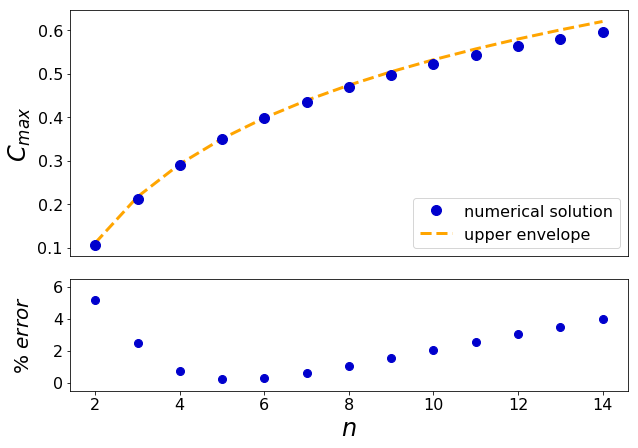

N 	C (true)  C (est.)
-- 	--------  --------
2 	   0.106     0.111
3 	   0.212     0.218
4 	   0.291     0.293
5 	   0.350     0.351
6 	   0.398     0.399
7 	   0.437     0.439
8 	   0.469     0.474
9 	   0.497     0.505
10 	   0.522     0.533
11 	   0.544     0.558
12 	   0.563     0.580
13 	   0.581     0.601
14 	   0.597     0.621


In [7]:
N1 = np.arange(13)+2
C1 = Cmax(N1)

model = A1*np.log(B1*N1)



plt.figure(figsize=(10,7))
plt.subplot2grid(shape=(3,1), loc=(0,0), rowspan=2, colspan=1)
plt.plot(N1, C1, 'o', c='mediumblue', ms=10, label='numerical solution')
plt.plot(N1, model, c='orange', ls='--', lw=3, label='upper envelope', zorder=0)
plt.xticks([])
plt.ylabel(r'$C_{max}$', fontsize=24)
plt.yticks(fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.subplot2grid(shape=(3,1), loc=(2,0), rowspan=1, colspan=1)
plt.plot(N1, (model-C1)/C1*100, 'o', c='mediumblue', ms=8)
plt.ylabel(r'$\%\ error$', fontsize=20, labelpad=20)
plt.ylim(-0.5,6.5)
plt.yticks([0,2,4,6], fontsize=16)
plt.xlabel(r'$n$', fontsize=24)
plt.xticks(fontsize=16)
plt.savefig('/Users/research/Desktop/Figures/Cmax.pdf')
plt.show()


print('N \tC (true)  C (est.)')
print('-- \t--------  --------')

for i, N in enumerate(N1):
    print('%d \t   %.3f     %.3f' %(N, C1[i], model[i]))